### 0. 데이터 불러오기

In [1]:
# scikit-learn 라이브러리 임포트
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)

In [23]:
# class를 float취급
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
sy = pd.Series(wine.target, dtype="int")
df['class'] = sy

In [ ]:
# class를 카테고리로 취급
#wine = load_wine()
#df = pd.DataFrame(wine.data, columns=wine.feature_names)
#sy = pd.Series(wine.target, dtype="category")
#sy = sy.cat.rename_categories(wine.target_names)
#df['class'] = sy

In [24]:
df.shape

(178, 14)

In [ ]:
df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0


- feature
    + alcohol : 알콜
    + malic_acid : 말산
    + ash : 회분
    + alcalinity_of_ash : 회분의 알칼리도
    + magnesium : 마그네슘
    + total_phenols : 총 폴리페놀
    + flavanoids : 플라보노이드 폴리페놀
    + nonflavanoid_phenols : 비 플라보노이드 폴리페놀
    + proanthocyanins : 프로안토시아닌
    + color_intensity : 색상의 강도
    + hue : 색상
    + od280/od315_of_diluted_wines : 희석 와인의 OD280/OD315 비율 
    + proline : 프롤린

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


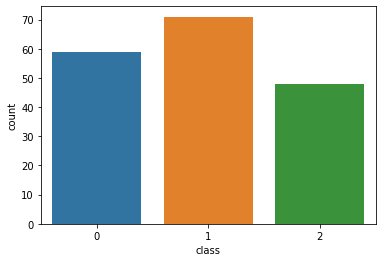

In [ ]:
sns.countplot(df['class']);

In [ ]:
#결측값 없음
df.isnull().any()

alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines    False
proline                         False
class                           False
dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

### 01. 전처리 아이디어
##### 1) 상관계수 기준

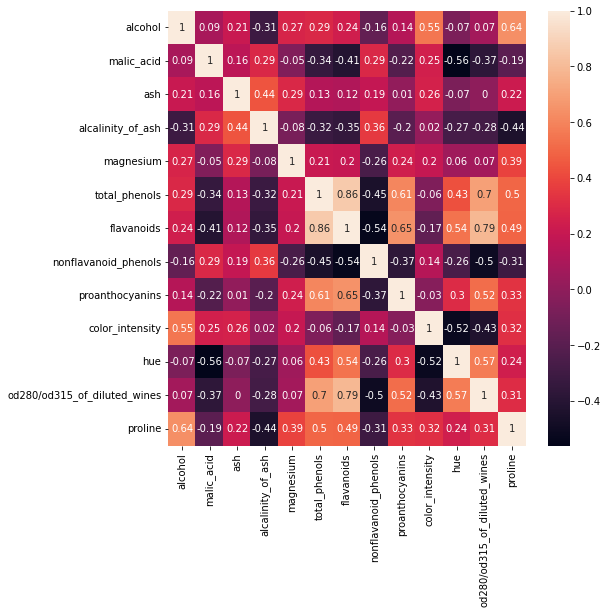

In [ ]:
plt.figure(figsize=(8, 8))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [5]:
df.drop('total_phenols', axis=1, inplace =True) # 상관된 피쳐 제거하기

- 상관계수 가장 높은 항목은 Total_phenols - Flavanoids => 0.86
- 둘 중 하나 drop하기

##### 2) 변수 중요도 기준으로 drop - 간단하게 Random Forest로 알아봄

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2022, stratify=y)

In [ ]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
X_train = scaler1.fit_transform(X_train) 
X_test = scaler1.transform(X_test) 
#dataframe형태로 변환
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


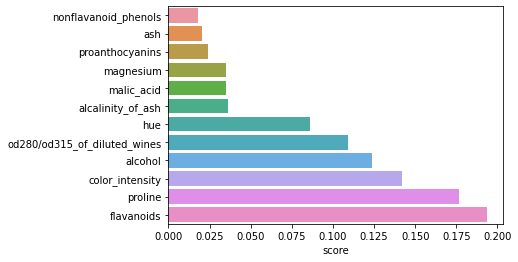

In [ ]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(64)
model_feature_importance = RandomForestClassifier(n_estimators=1000).fit(X_train, y_train).feature_importances_
feature_scores = pd.DataFrame({'score':model_feature_importance}, index=list(X_train.columns)).sort_values('score')
sns.barplot(feature_scores['score'], feature_scores.index)

- => 상위 6개 항목(flavanoids, proline, color_intensity, alcohol, od280/od315_of_diluted_wines, hue) 만 사용해보기

##### 3) 최종 데이터

In [6]:
column_sets = ['flavanoids', 'proline', 'color_intensity', 'alcohol', 'od280/od315_of_diluted_wines', 'hue','class']
wine_data = df[column_sets]

In [7]:
wine_data.shape

(178, 7)

In [ ]:
wine_data.head()

,flavanoids,proline,color_intensity,alcohol,od280/od315_of_diluted_wines,hue,class
0,3.06,1065.0,5.64,14.23,3.92,1.04,0
1,2.76,1050.0,4.38,13.20,3.40,1.05,0
2,3.24,1185.0,5.68,13.16,3.17,1.03,0
3,3.49,1480.0,7.80,14.37,3.45,0.86,0
4,2.69,735.0,4.32,13.24,2.93,1.04,0


### 02. 분류학습 - pytorch

- optimizer: SGD, activation function: Sigmoid (변경 x)


In [8]:
import torch
from torch import nn, optim
from sklearn.datasets import load_iris
from torch.utils.data import  TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [9]:
# 연산 방법 
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [ ]:
torch.cuda.is_available()

True

- train, test 데이터 준비 -> scaling

In [10]:
# train / test 나누기
input = wine_data.drop('class', axis=1).values
output = wine_data['class'].values
X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.33, random_state = 42,stratify=output, shuffle=True)

print(len(X_train))
print(len(X_test))

119
59


In [11]:
# label balance 확인
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 39, 1: 48, 2: 32}

In [12]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
X_train = scaler1.fit_transform(X_train) 
X_test = scaler1.transform(X_test) 

In [13]:
X_train = torch.FloatTensor(X_train).to(device)
y_train = torch.LongTensor(y_train).to(device)
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)

In [ ]:
print(X_train[0])
print(y_train[0])

tensor([0.7118, 0.8424, 0.3686, 0.7158, 0.6151, 0.5447], device='cuda:0')
tensor(0, device='cuda:0')


- input 변수는 총 6개 / output의 class 개수는 3개

In [14]:
 model = nn.Sequential(
          nn.Linear(6, 50, bias=True), # input_layer = 6, hidden_layer1 = 50
          nn.Sigmoid(),
          nn.Linear(50, 50, bias=True), # hidden_layer1 = 50, hidden_layer2 = 50
          nn.Sigmoid(),
          nn.Linear(50, 3, bias=True), # hidden_layer2 = 50, output_layer = 3
          nn.Softmax()
          ).to(device)

- imbalanced data -> weight 부여

In [15]:
from sklearn.utils.class_weight import compute_class_weight
label = [0] * 39 + [1] * 48 + [2] * 32
compute_class_weight(class_weight = "balanced" ,  classes=np.unique(output), y = output)

array([1.00564972, 0.83568075, 1.23611111])

In [16]:
class_weights= compute_class_weight(class_weight = "balanced" ,  classes=np.unique(output), y = output)
class_weights=torch.tensor(class_weights,dtype=torch.float).to(device)

- 손실함수, optimizer 

In [17]:
loss_fn = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.SGD(model.parameters(), lr=1) #learning_rate=1

In [18]:
losses = []
for epoch in range(300):
    
    #경사 초기화
    optimizer.zero_grad() 
    # forward 순전파 연산
    hypothesis = model(X_train)

    # 비용 함수
    cost = loss_fn(hypothesis, y_train)
    cost.backward()
    optimizer.step()
    losses.append(cost.item()) # 값만 가져오기 위해서 .item()

    # 10의 배수에 해당되는 에포크마다 비용을 출력
    if epoch % 10 == 0:
        print(epoch, cost.item())

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


0 1.0999715328216553
10 1.0975451469421387
20 1.0969116687774658
30 1.0962321758270264
40 1.095486044883728
50 1.0946489572525024
60 1.0936909914016724
70 1.0925754308700562
80 1.0912548303604126
90 1.0896670818328857
100 1.0877281427383423
110 1.0853222608566284
120 1.0822862386703491
130 1.078384280204773
140 1.0732707977294922
150 1.066430926322937
160 1.0571022033691406
170 1.0441911220550537
180 1.0262807607650757
190 1.0020124912261963
200 0.9712826609611511
210 0.9368380308151245
220 0.90360426902771
230 0.8749620914459229
240 0.8509306907653809
250 0.829694390296936
260 0.8092566132545471
270 0.7881131768226624
280 0.7655304670333862
290 0.7417532205581665


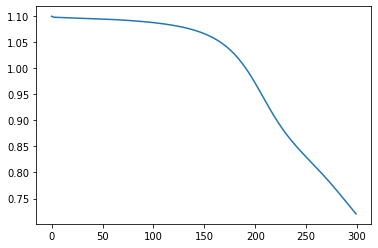

In [19]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()

In [20]:
with torch.no_grad():

    model = model.to('cpu')
    y_pred = model(X_test)

    y_pred = y_pred.detach().numpy() # tensor를 numpy로 바꿈
    predicted = np.argmax(y_pred,axis=1)
    print(f'model의 output은 :  {y_pred[0]}' )
    print(f'argmax를 한 후의 output은 {predicted[0]}')
    accuracy = (accuracy_score(predicted,y_test))
    print(f'accuracy는 {accuracy}')

model의 output은 :  [0.25211692 0.7223707  0.02551246]
argmax를 한 후의 output은 1
accuracy는 0.9322033898305084


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
